# Schwarshild coordinates Einstein Tensor calculations using Symbolic module - Textbook style. 

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor

sympy.init_printing()

### Look at http://arxiv.org/abs/1705.02496 . 



![alt-text](img/vaidya.png "Schwarschild coords")


In [2]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w, v = sympy.symbols("G M F a w v")
a = M*(1 - F*sin(w*(syms[0] - syms[1]/v)))

mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -1/(v*v*v*v)/(1 - 2*a/syms[1])
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


-F*M*w*cos(w*(-r/v + t))
F*M*w*cos(w*(-r/v + t))/v


⎡                   -1                                                                          ⎤
⎢─────────────────────────────────────────                   0                    0       0     ⎥
⎢   ⎛      ⎛       ⎛  ⎛  r    ⎞⎞    ⎞    ⎞                                                      ⎥
⎢   ⎜  2⋅M⋅⎜- F⋅sin⎜w⋅⎜- ─ + t⎟⎟ + 1⎟    ⎟                                                      ⎥
⎢ 4 ⎜      ⎝       ⎝  ⎝  v    ⎠⎠    ⎠    ⎟                                                      ⎥
⎢v ⋅⎜- ────────────────────────────── + 1⎟                                                      ⎥
⎢   ⎝                r                   ⎠                                                      ⎥
⎢                                                                                               ⎥
⎢                                                            1                                  ⎥
⎢                    0                      ────────────────────────────────────  0       0     ⎥
⎢                   

### Calculating the Einstein Tensor (with both indices covariant)

In [3]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                    ⎛  ⎛r    ⎞⎞                                        ⎛  ⎛r    ⎞⎞                                                                                    
⎢         2⋅F⋅M⋅w⋅cos⎜w⋅⎜─ - t⎟⎟                             2⋅F⋅M⋅w⋅cos⎜w⋅⎜─ - t⎟⎟                                                                                    
⎢                    ⎝  ⎝v    ⎠⎠                                        ⎝  ⎝v    ⎠⎠                                                                                    
⎢───────────────────────────────────────               ──────────────────────────────────                                                                              
⎢   5 ⎛           ⎛  ⎛r    ⎞⎞          ⎞                 ⎛         ⎛  ⎛r    ⎞⎞          ⎞                                                                              
⎢r⋅v ⋅⎜- 2⋅F⋅M⋅sin⎜w⋅⎜─ - t⎟⎟ - 2⋅M + r⎟               r⋅⎜2⋅F⋅M⋅sin⎜w⋅⎜─ - t⎟⎟ + 2⋅M - r⎟                                                                       

In [4]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡  ⎛     2    2  6  2    2⎛  ⎛r    ⎞⎞      2    2  6  2    2⎛  ⎛r    ⎞⎞      2    2  2    2⎛  ⎛r    ⎞⎞      2    2  2    2⎛  ⎛r    ⎞⎞      2            ⎛    ⎛r    ⎞⎞  
⎢M⋅⎜- 2⋅F ⋅M⋅r ⋅v ⋅w ⋅sin ⎜w⋅⎜─ - t⎟⎟ - 2⋅F ⋅M⋅r ⋅v ⋅w ⋅cos ⎜w⋅⎜─ - t⎟⎟ + 2⋅F ⋅M⋅r ⋅w ⋅sin ⎜w⋅⎜─ - t⎟⎟ + 2⋅F ⋅M⋅r ⋅w ⋅cos ⎜w⋅⎜─ - t⎟⎟ - 2⋅F ⋅M⋅r⋅v⋅w⋅sin⎜2⋅w⋅⎜─ - t⎟⎟ +
⎢  ⎝                      ⎝  ⎝v    ⎠⎠                       ⎝  ⎝v    ⎠⎠                    ⎝  ⎝v    ⎠⎠                    ⎝  ⎝v    ⎠⎠                   ⎝    ⎝v    ⎠⎠  
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                                                                                      
⎢                                                                                                                                                               

(t, r, theta, phi, F, M, v, w)


Text(0.5, 1.0, 'T_01')

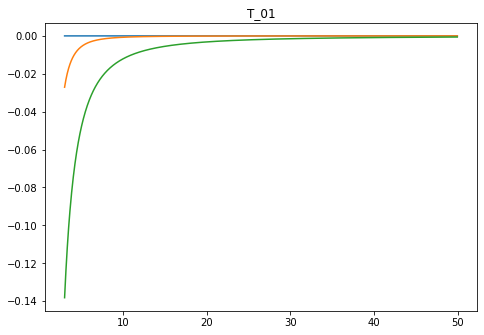

In [5]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

v = 200.05

theta = 1


#Make x values - which we will sub in for r 
x = np.arange(3.0, 50.0, 0.04)
func(0.5,x,0, 0, 1, 1, 20, 1)[0][0]

# Call the functions
tt = func(1.0,x,theta, 1, 1, 1, v, 1)[0][0]

tr = func(1.0,x,theta, 1, 1, 1, v, 1)[0][1]

rr = func(1.0,x,theta, 1, 1, 1, v, 1)[1][1] 

hh = func(1.0,x,theta, 1, 1, 1, v, 1)[2][2]/(x*x)

pp = func(1.0,x,theta, 1, 1, 1, v, 1)[3][3]/(x*x*sin(theta)*sin(theta))


fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,tt)
ax.plot(x,rr)
ax.plot(x,tr)

#ax.plot(x,hh)

#ax.plot(x,pp)



ax.set_title("T_01")



In [6]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                                                                                                                      
⎢                                                                                                                                                                      
⎢                                                                                                                                                                      
⎢                                                                                                                                                          ⎡0          
⎢                                                                                                                                                          ⎢           
⎢                                                                                                                                                          ⎢    

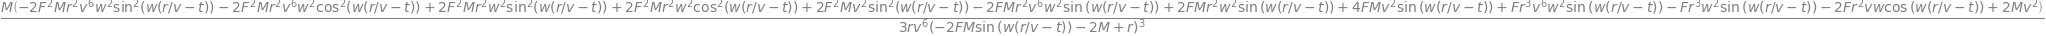

In [7]:
weyl[0,1,0,1]

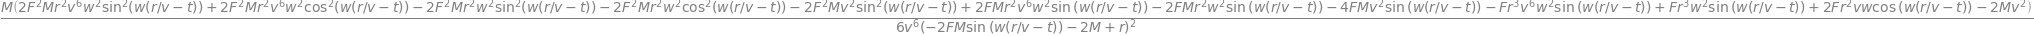

In [8]:
weyl[0,2,0,2]

In [38]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")




(t, r, theta, phi, F, M, v, w)


TypeError: _lambdifygenerated() missing 3 required positional arguments: 'M', 'v', and 'w'